In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [7]:
#1 IRIS data 
df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv")

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

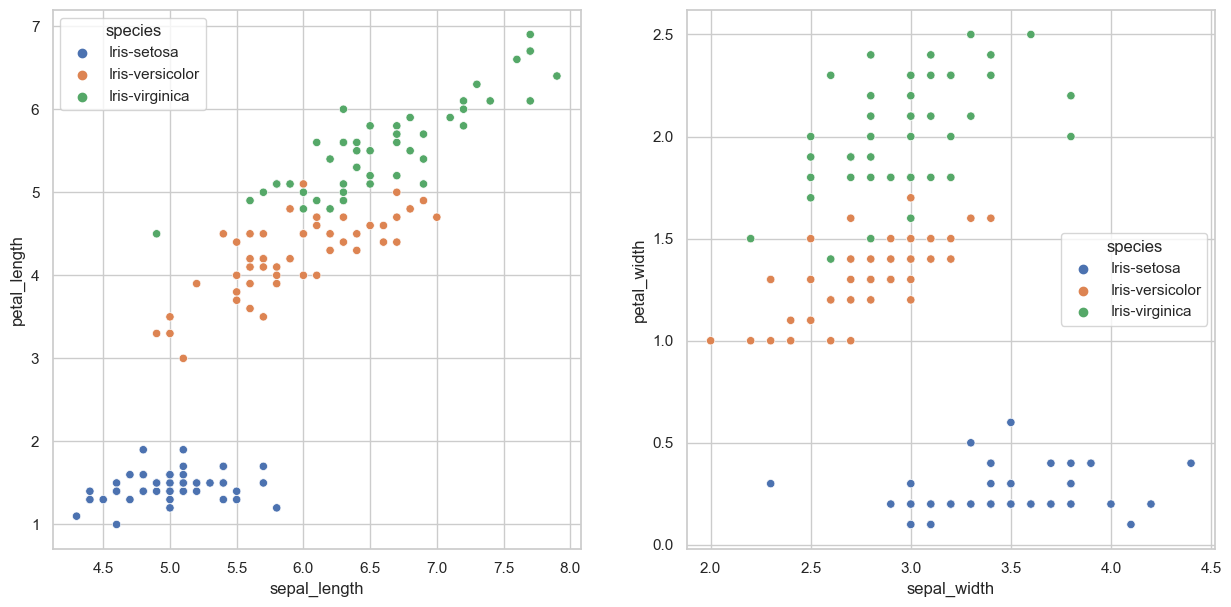

In [23]:
#1.1
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.scatterplot(ax=axes[0], x = "sepal_length", y = "petal_length", hue = "species", data=df)
sns.scatterplot(ax=axes[1], x = "sepal_width", y = "petal_width", hue = "species", data=df)

What can you say about the relationship given the figure?

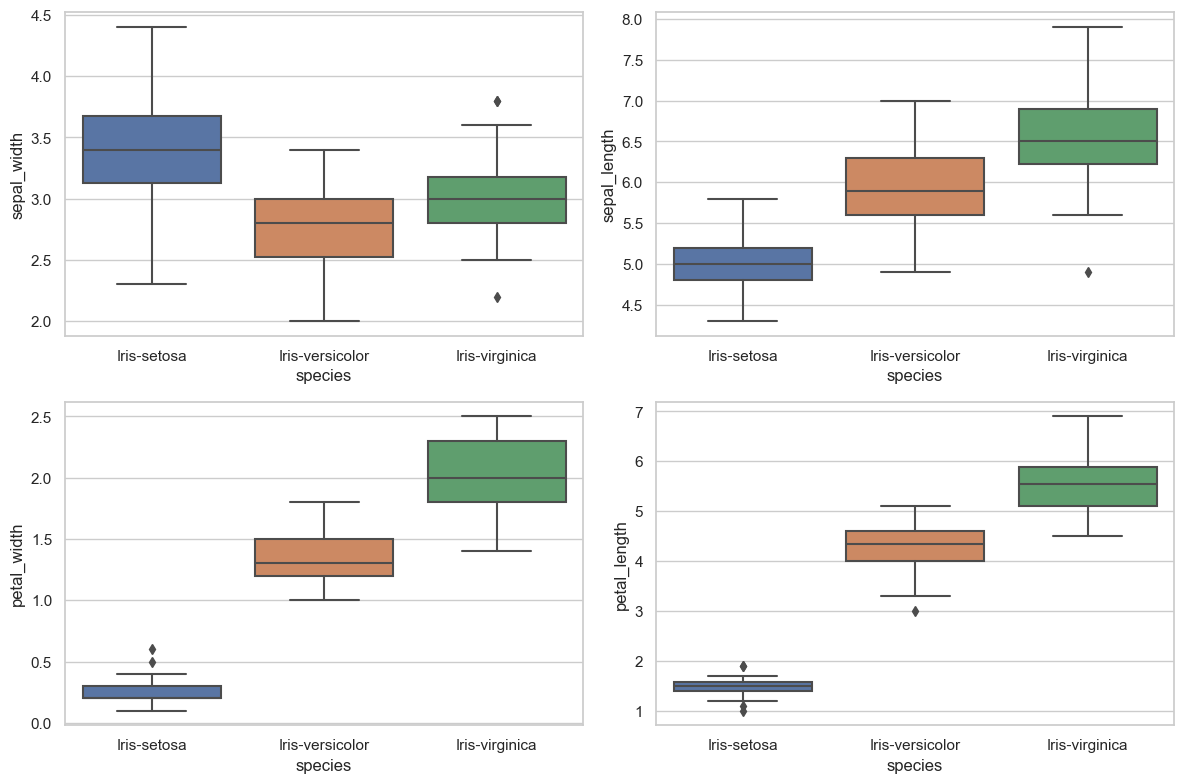

In [17]:
#1.2
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x="species", y="sepal_width", data=df)

plt.subplot(2, 2, 2)
sns.boxplot(x="species", y="sepal_length", data=df)

plt.subplot(2, 2, 3)
sns.boxplot(x="species", y="petal_width", data=df)

plt.subplot(2, 2, 4)
sns.boxplot(x="species", y="petal_length", data=df)

plt.tight_layout()
plt.show()

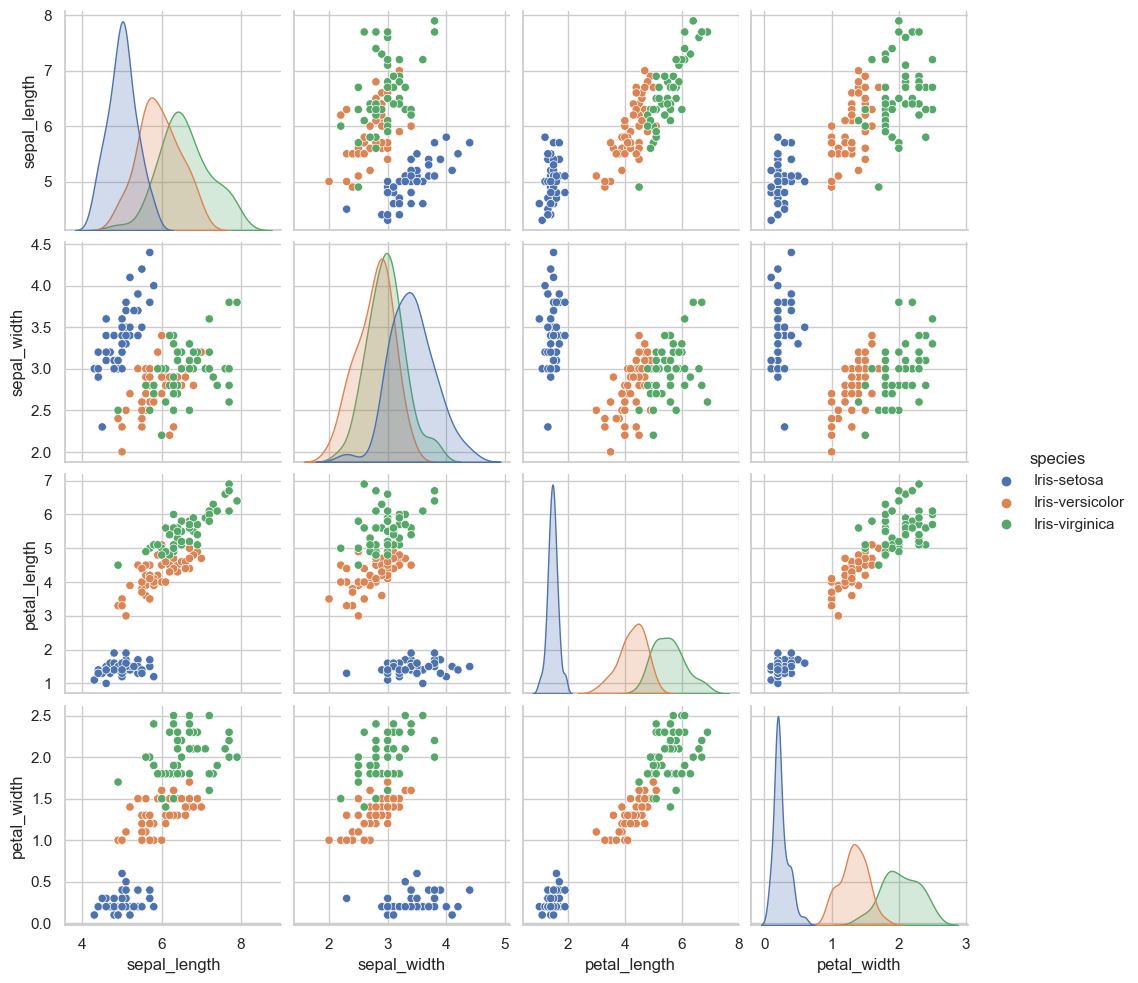

In [18]:
#1.3
sns.set(style="whitegrid")
sns.pairplot(df, hue="species")
plt.show()

In [150]:
#2 Birdwatching
df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/artportalen.csv")
df['Antal'] = pd.to_numeric(df['Antal'], errors='coerce')
#print(df)
#2.1 What are the most prevelant species?
sorted_df = df[["Artnamn", "Antal"]]
grouped_df = sorted_df.groupby("Artnamn").sum()
grouped_df["Total"]= grouped_df.sum(axis=1)
Sort_grouped = grouped_df.sort_values("Total", ascending=False).head(3)
Sort_grouped

,Antal,Total
Artnamn,,
Grönsiska,20211.0,20211.0
Sothöna,8308.0,8308.0
Gräsand,7167.0,7167.0


In [182]:
condition1 = df["Artnamn"].str.contains("Grönsiska") 
Grönsiska = df[condition1][["Artnamn","Startdatum", "Antal"]]
Grönsiska["Year-Month"] = pd.to_datetime(Grönsiska["Startdatum"], format="%Y-%m-%d").dt.to_period("m")
grouped_grön = Grönsiska.groupby("Year-Month")["Antal"].sum()
print(grouped_grön)


condition2 = df["Artnamn"].str.contains("Sothöna")
Sothöna = df[condition2][["Artnamn","Startdatum", "Antal"]]
Sothöna["Year-Month"] = pd.to_datetime(Sothöna["Startdatum"], format="%Y-%m-%d").dt.to_period("m")
grouped_sot = Sothöna.groupby("Year-Month")["Antal"].sum()
print(grouped_sot)

condition3 = df["Artnamn"].str.contains("Gräsand")
Gräsand = df[condition3][["Artnamn","Startdatum", "Antal"]]
Gräsand["Year-Month"] = pd.to_datetime(Gräsand["Startdatum"], format="%Y-%m-%d").dt.to_period("m")
grouped_gräs = Gräsand.groupby("Year-Month")["Antal"].sum()
print(grouped_gräs)



#Sothöna = df[condition2][["Artnamn","Startdatum", "Antal"]]
#Gräsand = df[condition3][["Artnamn","Startdatum", "Antal"]]

Year-Month
2022-01    19507.0
2022-02      648.0
2022-03       33.0
2022-04        6.0
2022-05       10.0
2022-06        7.0
Freq: M, Name: Antal, dtype: float64
Year-Month
2022-01    2142.0
2022-02    2100.0
2022-03    3052.0
2022-04     614.0
2022-05     288.0
2022-06     112.0
Freq: M, Name: Antal, dtype: float64
Year-Month
2022-01    2953.0
2022-02    1583.0
2022-03    1152.0
2022-04     858.0
2022-05     515.0
2022-06     106.0
Freq: M, Name: Antal, dtype: float64
